In [7]:
# --- Load Agents --- #
from agents.agent_reinforce.agent import REINFORCEAgent
from agents.agent_deepqn.agent import DeepQAgent
# from agents.agent_ddpg.agent import DDPG_Agent
# from agents.agent_ppo.agent import PPOAgent

# --- Load Environments --- #
from environment.grid import GridEnv
# --- Load Necessary --- #
from collections import deque
import numpy as np
from utilities.helper import flatten
from utilities.profiler import profile

# --- Load Training --- #
from experiments.experiment import Experiment

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Experiments

In [8]:
from agents.agent_reinforce.agent import REINFORCEAgentConfig
from agents.agent_deepqn.agent import DeepQAgentConfig


In [9]:
    num_episodes = 2000
    max_t = 100

    """
    order of config: num_agent, grid_size, agents_start, goals_start, prob_right_direction, actor_critic 
    init environment: num_agent = 2, grid_size = 8, prob_right_direction = 1, agents_start = [], goals_start=[], render_board = False
    init of dqn:  state_size, action_size, config = DeepQAgentConfig(), seed = 1, samp_frames=1
    init of rei:  state_size, action_size, config = REINFORCEAgentConfig(), seed = 1 <- no hidden layer!
    """

'\norder of config: num_agent, grid_size, agents_start, goals_start, prob_right_direction, actor_critic \ninit environment: num_agent = 2, grid_size = 8, prob_right_direction = 1, agents_start = [], goals_start=[], render_board = False\ninit of dqn:  state_size, action_size, config = DeepQAgentConfig(), seed = 1, samp_frames=1\ninit of rei:  state_size, action_size, config = REINFORCEAgentConfig(), seed = 1 <- no hidden layer!\n'

# Experiment Batch 1

In [10]:
from experiments.experiment_list import exp1_dqn, exp1_rei

## Experiment Batch 1 - DQN

In [11]:
dqn_experiments = []
for i, config in enumerate(exp1_dqn):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = DeepQAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = DeepQAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 1 - DQN - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    dqn_experiments.append(new_experiment)

print(len(dqn_experiments))

16


 Total score (averaged over agents) 1999 episode: 19.0 | 	Avarage in last 100 is 19.0Scores saved!
 Total score (averaged over agents) 1999 episode: 18.0 | 	Avarage in last 100 is 18.0Scores saved!
 Total score (averaged over agents) 1999 episode: 18.0 | 	Avarage in last 100 is 18.0Scores saved!
 Total score (averaged over agents) 1999 episode: 18.0 | 	Avarage in last 100 is 18.0Scores saved!
 Total score (averaged over agents) 1999 episode: 16.0 | 	Avarage in last 100 is 2.94Scores saved!
 Total score (averaged over agents) 1999 episode: 20.0 | 	Avarage in last 100 is 15.39Scores saved!
 Total score (averaged over agents) 1999 episode: 14.0 | 	Avarage in last 100 is 14.34Scores saved!
 Total score (averaged over agents) 1999 episode: 17.0 | 	Avarage in last 100 is 17.19Scores saved!
 Total score (averaged over agents) 1999 episode: 20.0 | 	Avarage in last 100 is 14.72Scores saved!
 Total score (averaged over agents) 1999 episode: 16.0 | 	Avarage in last 100 is 16.45Scores saved!
 Tota

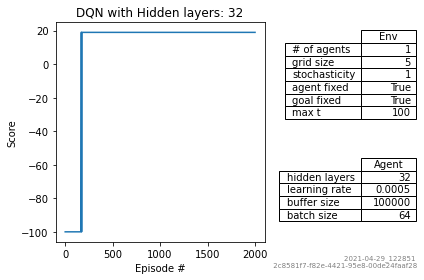

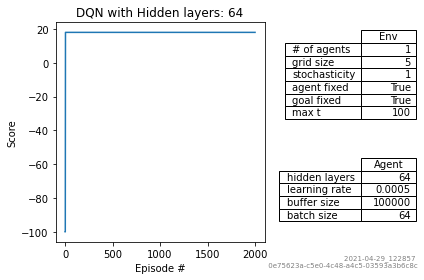

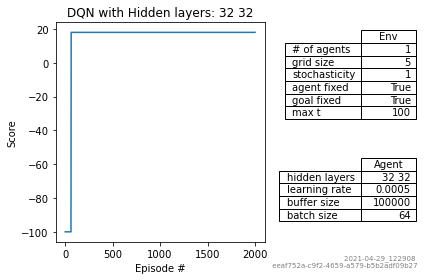

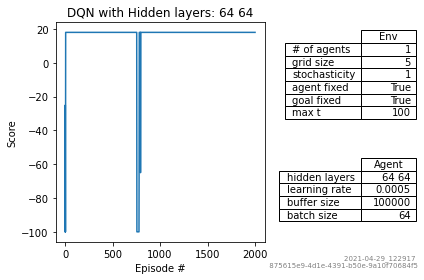

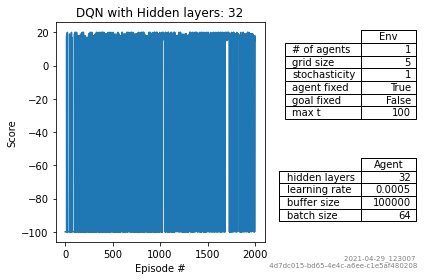

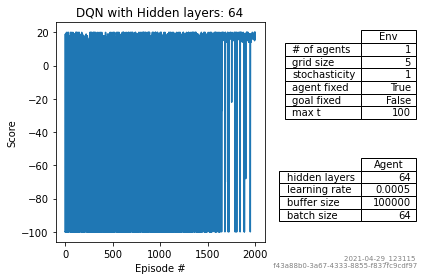

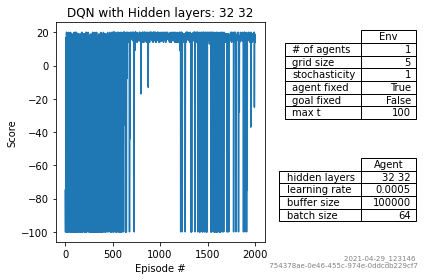

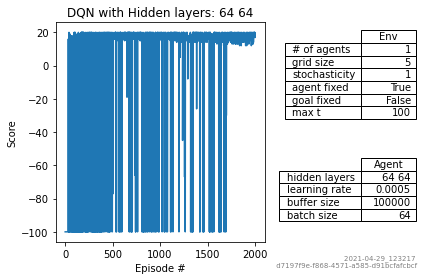

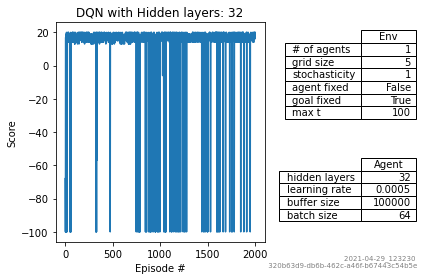

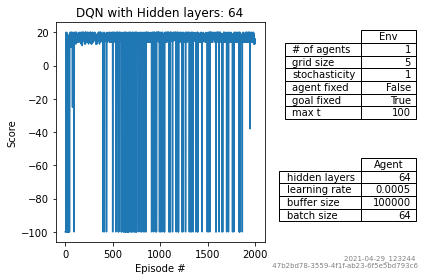

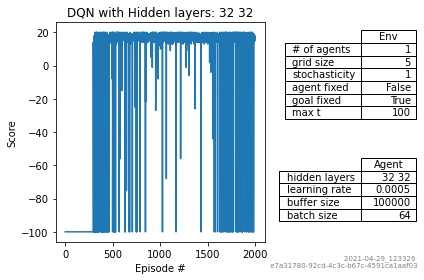

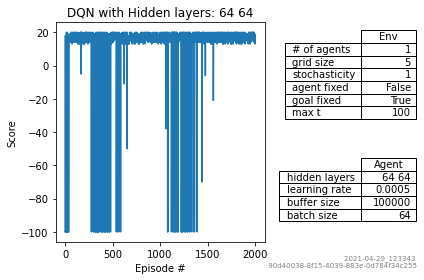

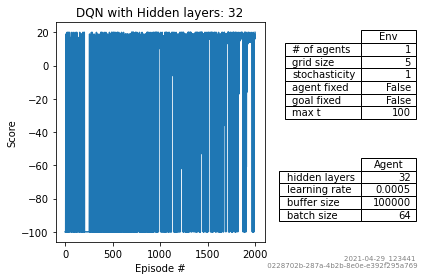

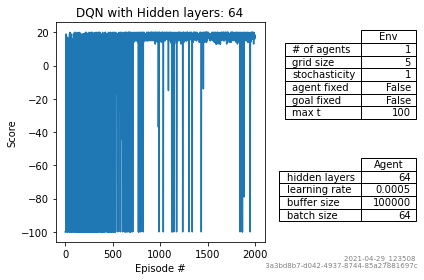

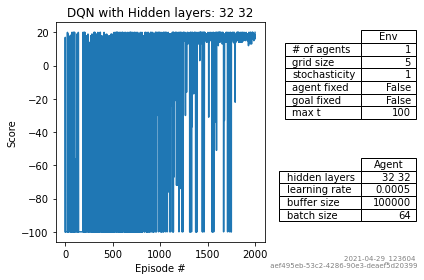

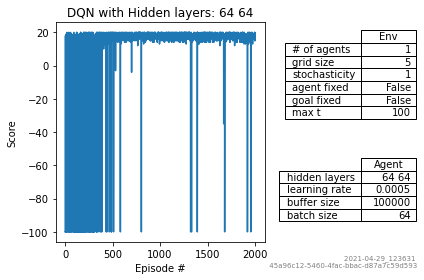

In [12]:
for experiment in dqn_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

## Experiment Batch 1 - REINFORCE

In [13]:
rei_experiments = []
for i, config in enumerate(exp1_rei):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = REINFORCEAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = REINFORCEAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 1 - REI - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    rei_experiments.append(new_experiment)

print(len(rei_experiments))

16


 Total score (averaged over agents) 1999 episode: 15.0 | 	Avarage in last 100 is 7.32Scores saved!
 Total score (averaged over agents) 1999 episode: 18.0 | 	Avarage in last 100 is 16.89Scores saved!
 Total score (averaged over agents) 1999 episode: 16.0 | 	Avarage in last 100 is 17.0Scores saved!
 Total score (averaged over agents) 1999 episode: 16.0 | 	Avarage in last 100 is 17.0Scores saved!
 Total score (averaged over agents) 1999 episode: -18.0 | 	Avarage in last 100 is -20.4Scores saved!
 Total score (averaged over agents) 1999 episode: 9.0 | 	Avarage in last 100 is -4.44Scores saved!
 Total score (averaged over agents) 1999 episode: 20.0 | 	Avarage in last 100 is -12.2Scores saved!
 Total score (averaged over agents) 1999 episode: 15.0 | 	Avarage in last 100 is 2.03Scores saved!
 Total score (averaged over agents) 1999 episode: 15.0 | 	Avarage in last 100 is 12.91Scores saved!
 Total score (averaged over agents) 1999 episode: 13.0 | 	Avarage in last 100 is 13.97Scores saved!
 Tot

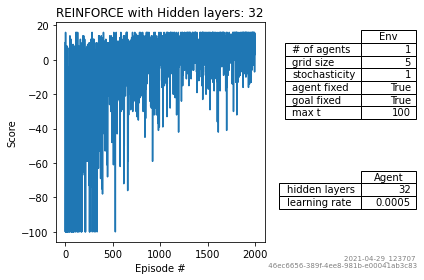

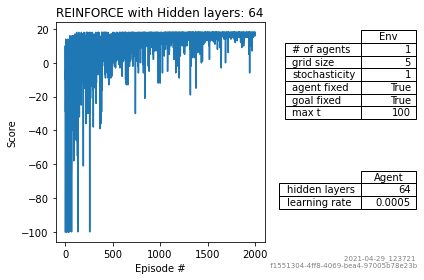

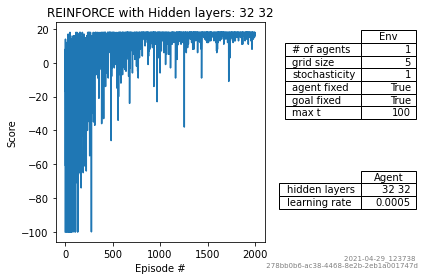

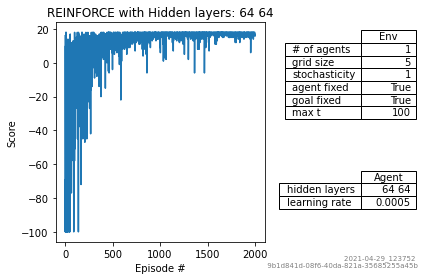

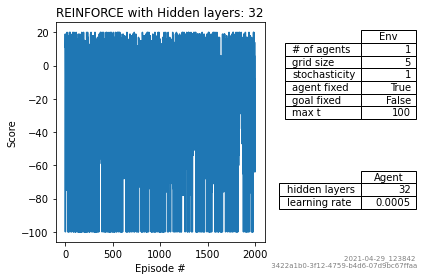

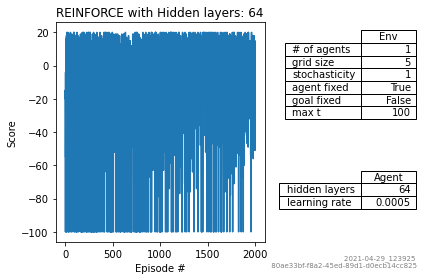

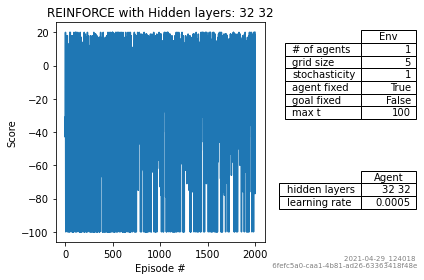

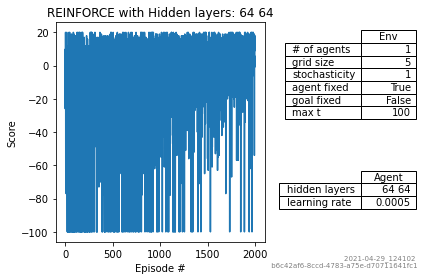

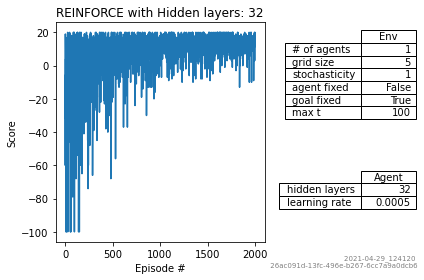

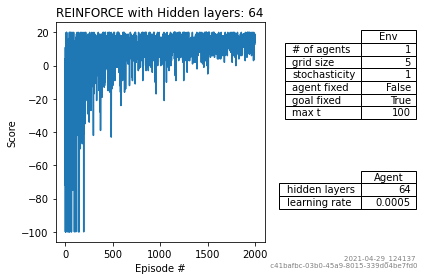

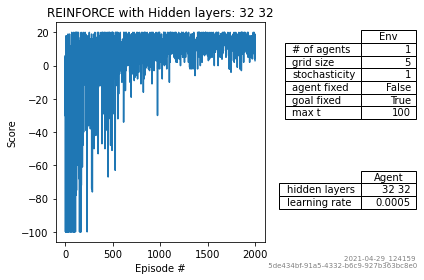

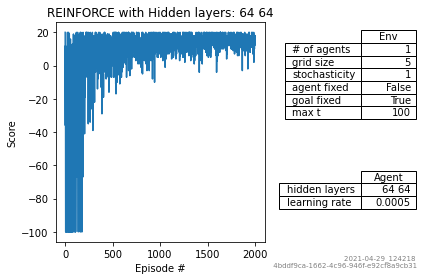

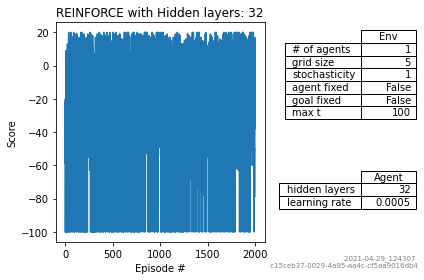

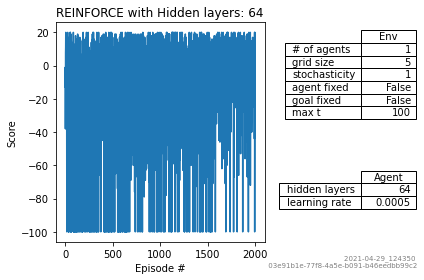

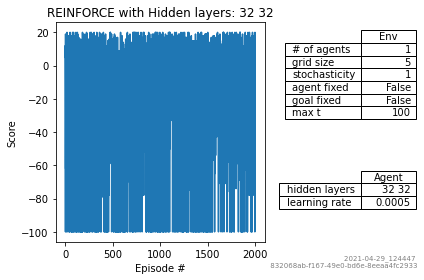

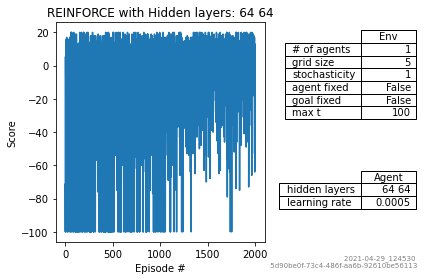

In [14]:
for experiment in rei_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

# Experiment Batch 2

In [15]:
from experiments.experiment_list import exp2_dqn, exp2_rei

## Experiment Batch 2 - DQN

In [16]:
dqn_experiments = []
for i, config in enumerate(exp2_dqn):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = DeepQAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = DeepQAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 2 - DQN - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    dqn_experiments.append(new_experiment)

print(len(dqn_experiments))

4


 Total score (averaged over agents) 1999 episode: -8.0 | 	Avarage in last 100 is -5.21Scores saved!
 Total score (averaged over agents) 1999 episode: 13.0 | 	Avarage in last 100 is 8.3Scores saved!
 Total score (averaged over agents) 1999 episode: 15.0 | 	Avarage in last 100 is 10.15Scores saved!
 Total score (averaged over agents) 1999 episode: 8.0 | 	Avarage in last 100 is 13.51Scores saved!


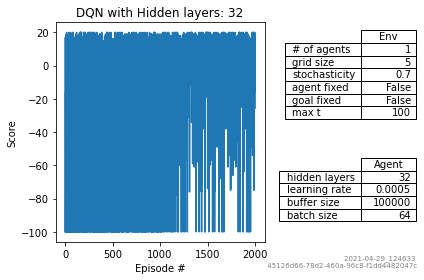

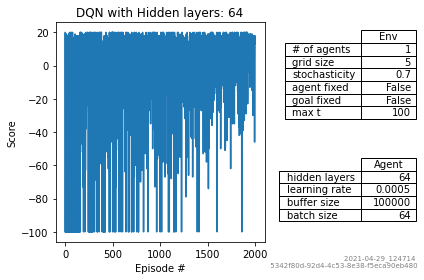

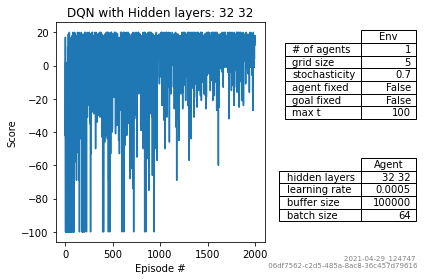

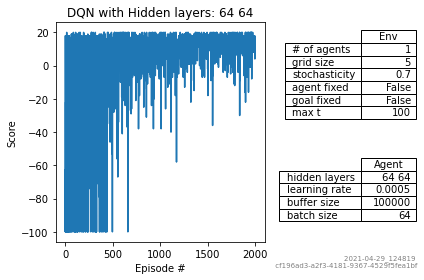

In [17]:
for experiment in dqn_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

## Experiment Batch 2 - REINFORCE

In [18]:
rei_experiments = []
for i, config in enumerate(exp1_rei):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = REINFORCEAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = REINFORCEAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 2 - REI - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    rei_experiments.append(new_experiment)

print(len(rei_experiments))

16


 Total score (averaged over agents) 1999 episode: -22.0 | 	Avarage in last 100 is 6.24Scores saved!
 Total score (averaged over agents) 1999 episode: 18.0 | 	Avarage in last 100 is 16.1Scores saved!
 Total score (averaged over agents) 1999 episode: 15.0 | 	Avarage in last 100 is 17.17Scores saved!
 Total score (averaged over agents) 1999 episode: 18.0 | 	Avarage in last 100 is 17.4Scores saved!
 Total score (averaged over agents) 1999 episode: -69.0 | 	Avarage in last 100 is -10.58Scores saved!
 Total score (averaged over agents) 1999 episode: 16.0 | 	Avarage in last 100 is -8.02Scores saved!
 Total score (averaged over agents) 1999 episode: 19.0 | 	Avarage in last 100 is -16.12Scores saved!
 Total score (averaged over agents) 1999 episode: -6.0 | 	Avarage in last 100 is 6.57Scores saved!
 Total score (averaged over agents) 1999 episode: 14.0 | 	Avarage in last 100 is 12.53Scores saved!
 Total score (averaged over agents) 1999 episode: 11.0 | 	Avarage in last 100 is 13.7Scores saved!
 

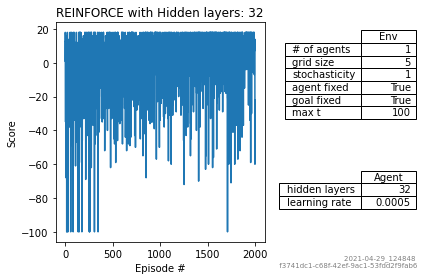

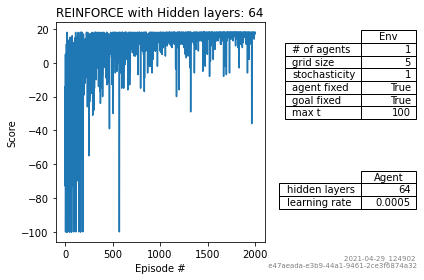

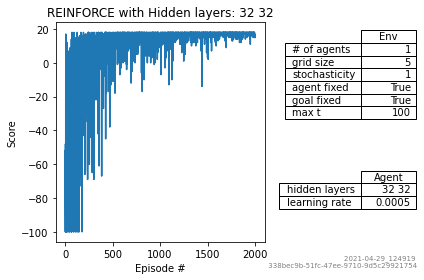

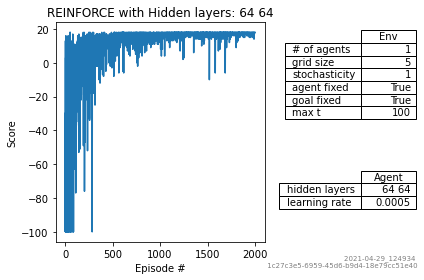

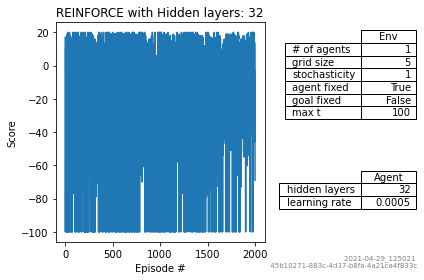

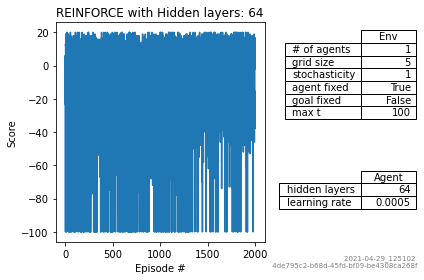

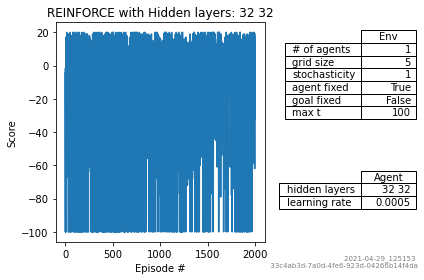

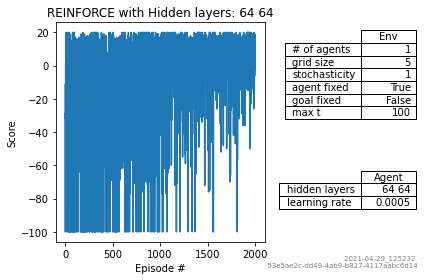

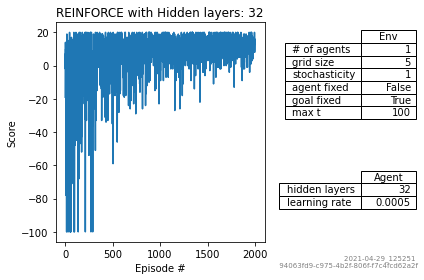

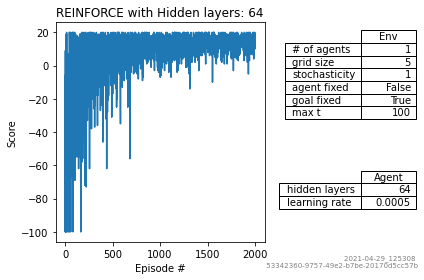

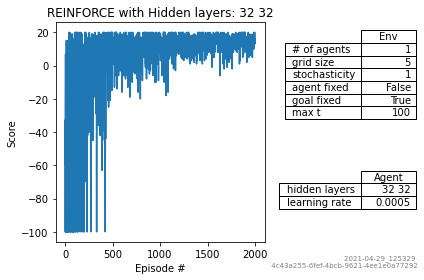

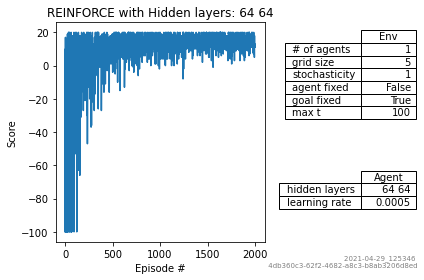

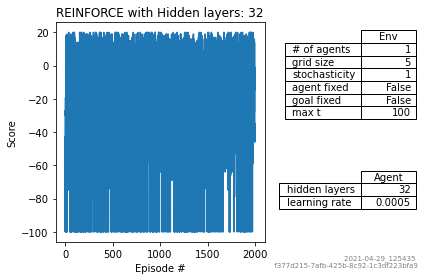

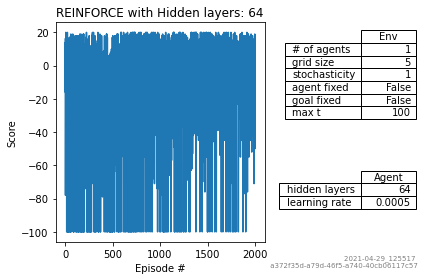

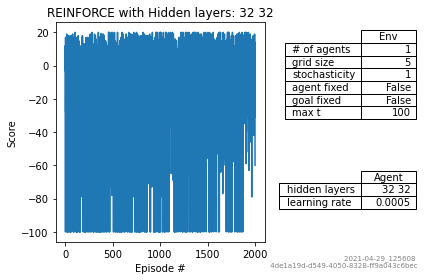

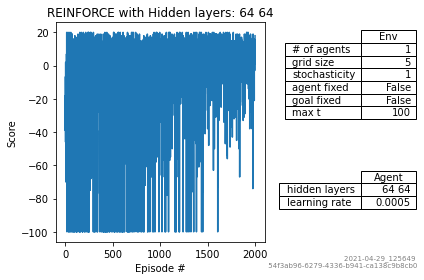

In [19]:
for experiment in rei_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

# Experiment Batch 3

In [20]:
from experiments.experiment_list import exp3_dqn, exp3_rei

## Experiment Batch 3 - DQN

In [21]:
dqn_experiments = []
for i, config in enumerate(exp3_dqn):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = DeepQAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = DeepQAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 3 - DQN - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    dqn_experiments.append(new_experiment)

print(len(dqn_experiments))

4


 Total score (averaged over agents) 1999 episode: -0.5 | 	Avarage in last 100 is -12.4Scores saved!
 Total score (averaged over agents) 1999 episode: 7.5 | 	Avarage in last 100 is 3.255Scores saved!
 Total score (averaged over agents) 1999 episode: 1.0 | 	Avarage in last 100 is -6.59Scores saved!
 Total score (averaged over agents) 1999 episode: 4.0 | 	Avarage in last 100 is 0.10333333333333333Scores saved!


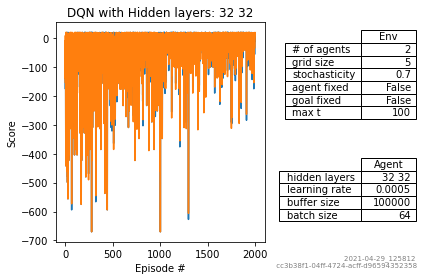

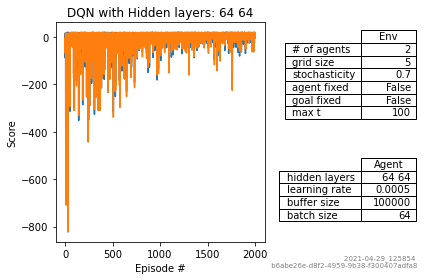

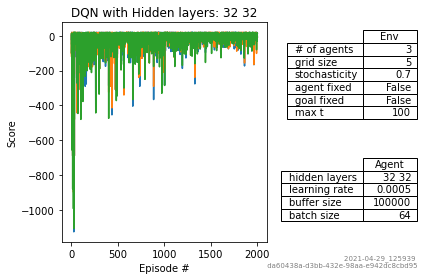

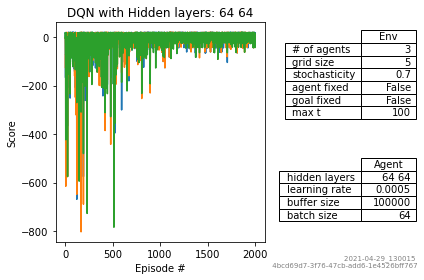

In [22]:
for experiment in dqn_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

## Experiment Batch 3 - REINFORCE

In [23]:
rei_experiments = []
for i, config in enumerate(exp3_rei):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = REINFORCEAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = REINFORCEAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 3 - REI - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    rei_experiments.append(new_experiment)

print(len(rei_experiments))

4


 Total score (averaged over agents) 1999 episode: -252.0 | 	Avarage in last 100 is -44.21Scores saved!
 Total score (averaged over agents) 1999 episode: -41.5 | 	Avarage in last 100 is -27.515Scores saved!
 Total score (averaged over agents) 1999 episode: -9.666666666666666 | 	Avarage in last 100 is -31.376666666666665Scores saved!
 Total score (averaged over agents) 1999 episode: -118.66666666666667 | 	Avarage in last 100 is -32.846666666666664Scores saved!


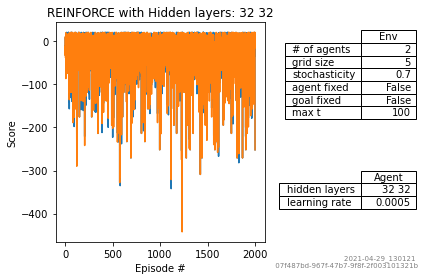

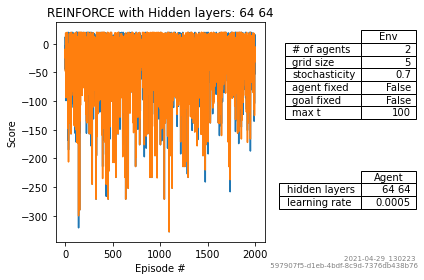

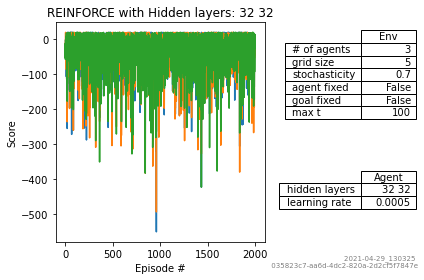

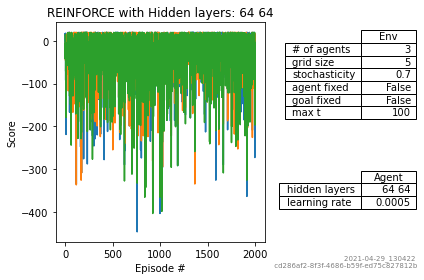

In [24]:
for experiment in rei_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

# Experiment Batch 4 - To be decided later!

In [25]:
from experiments.experiment_list import exp4_dqn, exp4_rei

## DQN

In [26]:
dqn_experiments = []
for i, config in enumerate(exp4_dqn):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = DeepQAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = DeepQAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 4 - DQN - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    dqn_experiments.append(new_experiment)

print(len(dqn_experiments))

4


 Total score (averaged over agents) 1999 episode: -53.5 | 	Avarage in last 100 is -94.365Scores saved!
 Total score (averaged over agents) 1999 episode: -100.0 | 	Avarage in last 100 is -85.635Scores saved!
 Total score (averaged over agents) 1999 episode: -150.66666666666666 | 	Avarage in last 100 is -81.42333333333333Scores saved!
 Total score (averaged over agents) 1999 episode: -100.0 | 	Avarage in last 100 is -84.58Scores saved!


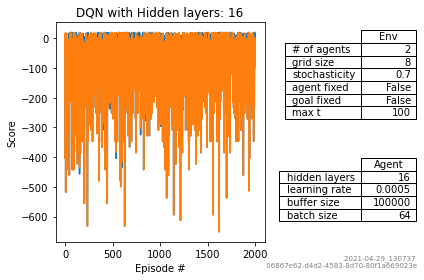

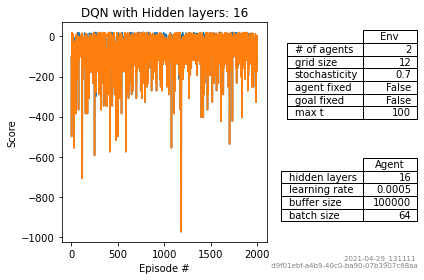

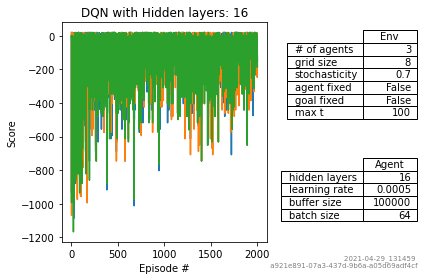

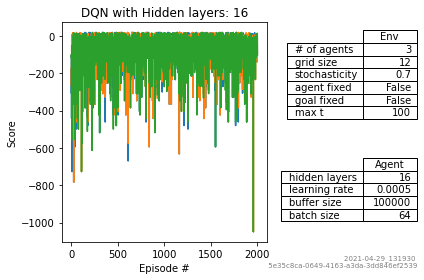

In [27]:
for experiment in dqn_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)

## REINFORCE

In [28]:
rei_experiments = []
for i, config in enumerate(exp4_rei):
    
    # --- Env --- #
    env = GridEnv(num_agent = config[0], grid_size = config[1], fixed_start = config[2], fixed_goals=config[3], prob_right_direction = config[4], render_board = False, agents_fully_observable = True)

    # --- Agents --- #
    agent_config = REINFORCEAgentConfig(HIDDEN_LAYER_SIZE=config[5])
    agent = REINFORCEAgent(env.state_space, env.action_space.n, seed=1, config=agent_config)
    agents = [agent for _ in range(env.num_agent)]

    # --- Experiment --- #
    new_experiment = Experiment(name="Batch 4 - REI - Exp_{}".format(str(i)), environment= env, agents=agents, max_t=max_t,                               num_episodes=num_episodes, goal = 0., save_states_every=0, experiment_num=i)
    rei_experiments.append(new_experiment)

print(len(rei_experiments))

4


 Total score (averaged over agents) 1999 episode: -100.0 | 	Avarage in last 100 is -54.965Scores saved!
 Total score (averaged over agents) 1999 episode: -47.5 | 	Avarage in last 100 is -80.14Scores saved!
 Total score (averaged over agents) 1999 episode: -68.33333333333333 | 	Avarage in last 100 is -53.43666666666667Scores saved!
 Total score (averaged over agents) 1999 episode: -100.0 | 	Avarage in last 100 is -69.07Scores saved!


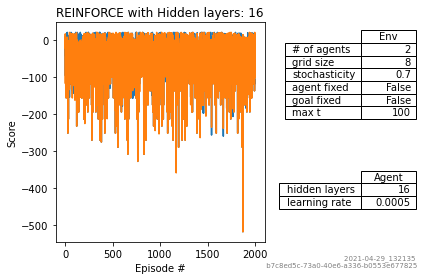

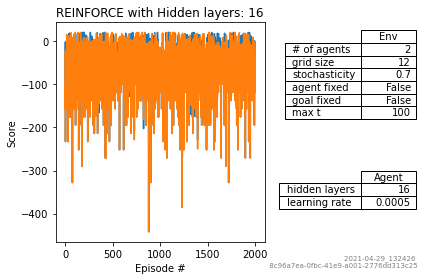

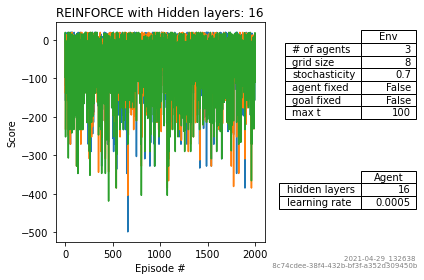

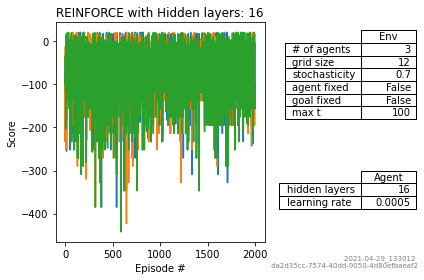

In [29]:
for experiment in rei_experiments:
    score_history, state_history = experiment.run()
    experiment.save(score_history, state_history, display = False)